In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and merge datasets

In [3]:
wine_market_data = pd.read_csv("wine_market_statistics_clean.csv")
wine_market_data.shape

(24, 8)

In [4]:
census_data = pd.read_csv("us_census_merged.csv")
census_data.shape

(24, 15)

In [5]:
merged_data = pd.merge(wine_market_data, census_data, on='Year', how="outer")
merged_data.shape

(24, 22)

In [6]:
merged_data.head(10)

,Year,Premium Wineries Gross Margins (%),US Wine Market Share (%),US Wine Consumption (Mgal),US Wine Production (Mgal),California Wine Production (Mgal),US Wine Sales Volume (Mgal),Californian Wine Market Value ($Bn),Num w/ small children,Median Income,...,Num Kids,Num Seniors,Num Teens,Num Young Adults,Total Population,High School,Some College,Bachelor's degree,Advanced degree,Basic education
0,1999,NaN,NaN,NaN,NaN,NaN,543.032096,NaN,NaN,67650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,NaN,NaN,NaN,NaN,NaN,567.996356,NaN,NaN,67470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,NaN,NaN,NaN,NaN,NaN,573.940227,NaN,NaN,66360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,51.5,NaN,NaN,NaN,NaN,594.387145,NaN,NaN,65820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,50.2,NaN,NaN,NaN,NaN,633.854451,NaN,NaN,65860,...,60684000.0,34234000.0,20181000.0,19884000.0,285935003.0,NaN,NaN,NaN,NaN,NaN
5,2004,51.5,NaN,NaN,NaN,NaN,662.860544,NaN,NaN,65760,...,60752000.0,34659000.0,20313000.0,20339000.0,288282004.0,68302000.0,58609000.0,35994000.0,18105000.0,NaN
6,2005,52.8,NaN,687.0,NaN,NaN,687.349294,NaN,NaN,66780,...,40467000.0,35210000.0,20662000.0,20408000.0,270907005.0,69446000.0,59276000.0,36520000.0,18225000.0,NaN
7,2006,54.5,NaN,707.0,623.26,557.13,706.845193,25.7,NaN,67520,...,60640000.0,35505000.0,20916000.0,20393000.0,293836006.0,69548000.0,60615000.0,37334000.0,18734000.0,NaN
8,2007,57.1,NaN,746.0,637.67,565.95,746.074744,25.7,31652000.0,68610,...,40274000.0,50006000.0,21170000.0,20532000.0,276298007.0,70266000.0,60681000.0,38940000.0,19364000.0,46769000.0
9,2008,55.3,NaN,747.0,619.68,545.86,747.263519,26.7,30539000.0,66280,...,40056000.0,51720000.0,21314000.0,20529000.0,278205008.0,69702000.0,62875000.0,40094000.0,20396000.0,45080000.0


In [7]:
merged_data.to_csv("forecast_data.csv", index=False)

## Correlations

In [8]:
def calculate_correlation(dataframe):
    # Calculate correlation matrix for the given DataFrame
    correlation_matrix = dataframe.corr()
    return correlation_matrix

In [41]:
def visualize_correlation(correlation_matrix, figsize=(8,5)):
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
    #plt.title('Correlation Between Variables')
    #plt.xlabel('Time Series')
    #plt.ylabel('Time Series')
    plt.tight_layout()
    plt.savefig("correlation_table.png", dpi=500)

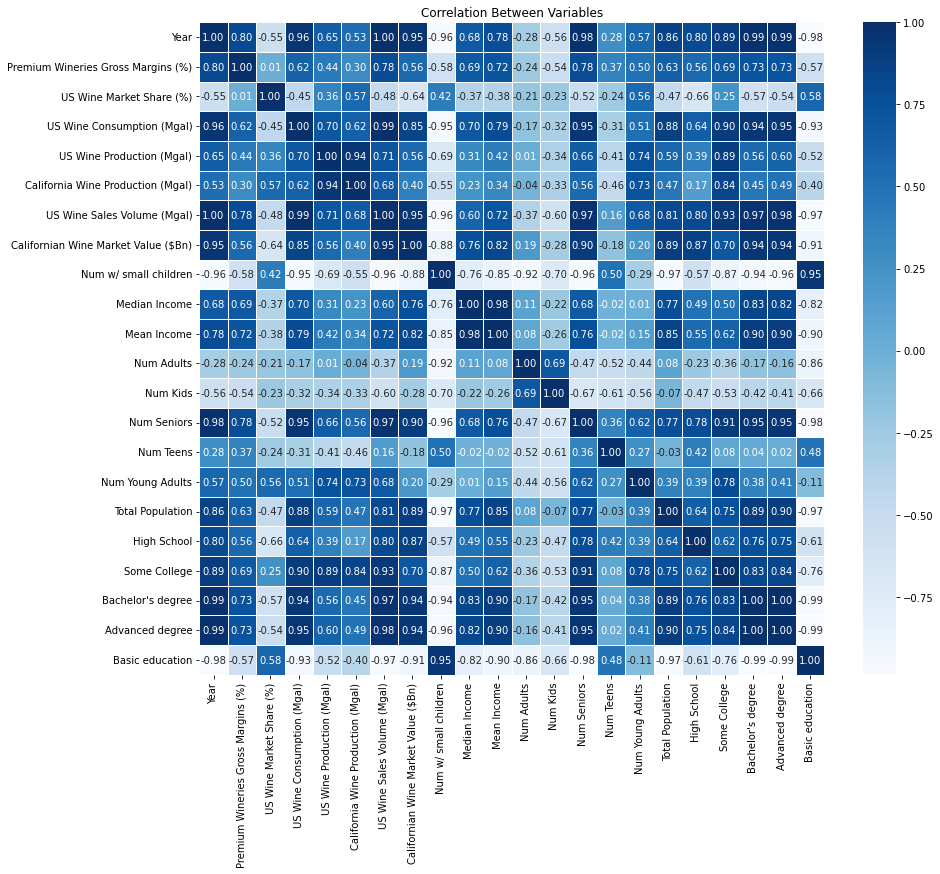

In [10]:
visualize_correlation(calculate_correlation(merged_data), figsize=(14,12))

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 24 non-null     int64  
 1   Premium Wineries Gross Margins (%)   21 non-null     float64
 2   US Wine Market Share (%)             13 non-null     float64
 3   US Wine Consumption (Mgal)           18 non-null     float64
 4   US Wine Production (Mgal)            17 non-null     float64
 5   California Wine Production (Mgal)    17 non-null     float64
 6   US Wine Sales Volume (Mgal)          23 non-null     float64
 7   Californian Wine Market Value ($Bn)  17 non-null     float64
 8   Num w/ small children                16 non-null     float64
 9   Median Income                        24 non-null     int64  
 10  Mean Income                          24 non-null     int64  
 11  Num Adults                        

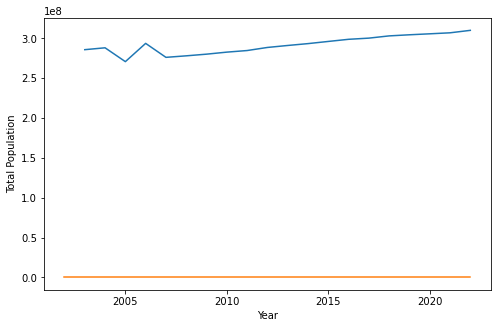

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(data=merged_data, x="Year", y="Total Population")
sns.lineplot(data=merged_data, x="Year", y="Premium Wineries Gross Margins (%)")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))

In [26]:
predictors = ["Total Population", "Median Income", "Mean Income", "Num Seniors", "Num w/ small children", "US Wine Production (Mgal)"]
targets = ["Premium Wineries Gross Margins (%)", "US Wine Consumption (Mgal)", "US Wine Sales Volume (Mgal)", "Californian Wine Market Value ($Bn)"]

In [27]:
data = merged_data[["Year"] + predictors + targets].copy()

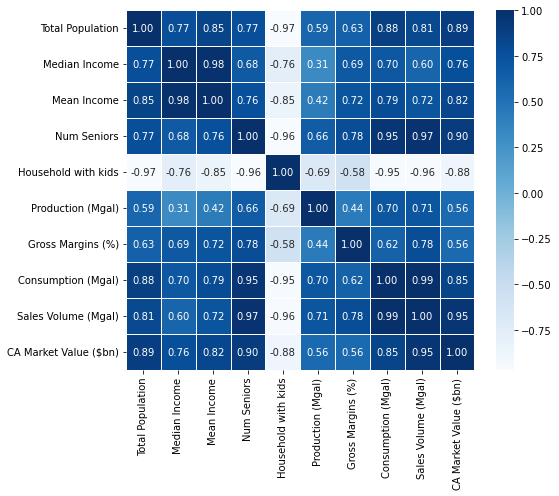

In [42]:
visualize_correlation(calculate_correlation(data.drop(columns=["Year"]).rename(columns={
    "Premium Wineries Gross Margins (%)": "Gross Margins (%)", "US Wine Consumption (Mgal)": "Consumption (Mgal)", "US Wine Sales Volume (Mgal)": "Sales Volume (Mgal)",
    "Californian Wine Market Value ($Bn)": "CA Market Value ($bn)", "Num w/ small children": "Household with kids", "US Wine Production (Mgal)": "Production (Mgal)"
})), figsize=(8,7))